# instagram-hashtag-usage
### Author: Andrew John (https://github.com/andrewjohnaj/)

This is a simple, beginner-friendly, web-browser automation code that helps you find out how many Instagram posts use specific hashtags. Unlike many tools, it does not require the Instagram API, which can be difficult to connect and has usage restrictions. All you need is Python and Jupyter to get started. This tool helps content creators and social media managers optimize their hashtag strategy by identifying trending and niche hashtags.

In [13]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from datetime import date, timedelta
from selenium.common.exceptions import NoSuchElementException

In [14]:
#Set up the Chrome WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open the Instagram search page
driver.get("https://www.instagram.com/")

#Define a wait object
wait = WebDriverWait(driver, 10)

### Go to the automation browser and enter your Instagram credentials, click on the search icon to open the search bar like so -

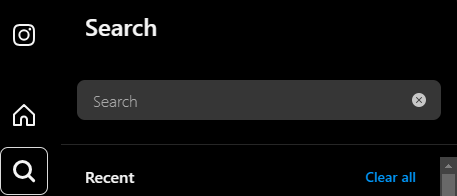

After selecting the search bar, come back to this notebook and execute the below cells

In [15]:
# Step 1: Load the txt file
# Assuming the text file contains one hashtag per line
file_path = 'hashtags_sample.txt'

# Read the text file into a DataFrame
# Since the file is a text file with one hashtag per line, we use 'read_csv' with 'delimiter' set to '\n' (newline)
df = pd.read_csv(file_path, header=None, delimiter='\n', names=['Hashtag'])  # 'Hashtag' is the name for the column

#Step 2: Add new columns for the results and the number of posts
df['HasResults'] = ''
df['NumPosts'] = ''

#Step 3: Define a function to check the results for the corresponding hashtags
    
def check_results(hashtag): 
    try:
        # Wait until the exact hashtag (without suffix) appears in the suggestions
        suggestion = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, f"//span[text()='{hashtag}']"))
        )
        
        # Click on the suggestion that matches the exact hashtag
        suggestion.click()
        
        # Wait for 2 seconds to give time for the new page to load
        time.sleep(2)
        
        # Wait for the number of posts element to appear
        post_count_element = WebDriverWait(driver, 5).until(
            EC.presence_of_element_located((By.XPATH, '/html/body/div[1]/div/div/div[2]/div/div/div[1]/div[1]/div[1]/section/main/header/div[2]/div/div[2]/div/span/span'))
        )

        # Extract the number of posts from the element
        num_posts = post_count_element.text
        return True, num_posts

    except (TimeoutException, NoSuchElementException):
        # If the hashtag is not found or no results, check for "No results found"
        try:
            no_results_present = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.XPATH, '//*[contains(text(), "No results found.")]'))
            )
            return False, 0
        except TimeoutException:
            # If neither are found, return False
            return False, 0

In [17]:
# Step 4: Iterate through the hashtags in the DataFrame
for index, row in df.iloc[:].iterrows():
    hashtag = str(row['Hashtag']).replace('\xa0', '').replace(' ', '').lower()  # Clean the hashtag

    # Step 5: Enter the hashtag in the search bar
    search_bar = wait.until(EC.presence_of_element_located((By.XPATH, '//input[@placeholder="Search"]')))
    search_bar.send_keys(hashtag)
    time.sleep(3)  # Wait for suggestions to appear

    # Step 6: Check if the hashtag appears and get the number of posts
    has_results, num_posts = check_results(hashtag)
    df.at[index, 'HasResults'] = has_results  # Record the presence of results
    df.at[index, 'NumPosts'] = num_posts  # Record the number of posts

    # Step 7: Clear the search bar using Ctrl+A and Delete
    search_bar.send_keys(Keys.CONTROL + "a")
    search_bar.send_keys(Keys.DELETE)
    time.sleep(1)  # Wait a bit before the next iteration

    # Save the updated DataFrame to the Excel file after each iteration
    df.to_excel('hashtag_list_output.xlsx', index=False)
    print(index, hashtag, has_results, num_posts)

0 #photography True 1,107,686,862
1 #dslrphotography True 1,107,686,862
2 #phonephotography True 3,278,508
3 #travelphotography True 9,578,988
4 #mobilephotography True 249,422,262
5 #wanderlust True 37,454,156
6 #travelfreak True 155,594,858
7 #streetphotography True 270,440
8 #landscapephotography True 128,981,090
9 #photoraphauckland False 0
